<a href="https://colab.research.google.com/github/constantin50/machine_learning/blob/master/algorithms/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import torch
from torch import nn

import torch.nn.functional as F
import matplotlib.pyplot as plt


In [85]:
# example

x_1 = np.random.uniform(1,7,27)
y_1 = np.random.uniform(1,7,27)

x_2 = np.random.uniform(9,15,27)
y_2 = np.random.uniform(8,15,27)

x_3 = np.random.uniform(1,7,27)
y_3 = np.random.uniform(10,17,27)

clust1 = [pair for pair in zip(x_1,y_1)]
clust2 = [pair for pair in zip(x_2,y_2)]
clust3 = [pair for pair in zip(x_3,y_3)]

x = torch.tensor(clust1 + clust2 + clust3)

K-means optimizes in-cluster distance of objects

$\sum_{k=1}^{K} \sum_{i=1}^{\ell}\left[a\left(x_{i}\right)=k\right] \rho\left(x_{i}, c_{k}\right)$  (*)

$K$ - number of clusters, $\ell$ - number of objects, $c_k$ - center of $kth$ cluster.

Les us centers of clusters are arbitary. Fix them and define in-cluster distance for each object.

$a\left(x_{i}\right)=\underset{1 \leqslant k \leqslant K}{\arg \min } \rho\left(x_{i}, c_{k}\right)$

Using euclidian distance we can take derivative of (*) with respect to a center $c_k$. Then we express formula for $c_k$

$c_{k}=\frac{1}{\sum_{i=1}^{\ell}\left[a\left(x_{i}\right)=k\right]} \sum_{i=1}^{\ell}\left[a\left(x_{i}\right)=k\right] x_{i}$

In [86]:
class K_means:
  def __init__(self):
    self.colors = ["lightcoral", "cornflowerblue", "seagreen", "plum", "khaki"]

  def clusterize(self, x, K, dim, epochs=10, plot=True):
    ''' 
    params
    ---

    x : pytorch tensor (L,dim)
      L data points

    K : int
      number of clusters
    
    epochs: int
    
    plot : bool
      plot avaliable only for 2d case
    
    returns
    ---

    clusters: pytorch tensor (K,L,dim)
      distribution of points over clusters

    '''
    if (plot == True & dim != 2): 
      raise NameError("Plot is defined only for dim = 2")

    # boundries for initial coordinates for clusters' centers
    min = torch.min(x).item() 
    max = torch.max(x).item() 

    L = len(x)

    c = torch.FloatTensor(K,dim).uniform_(min, max)
    

    for epoch in range(epochs):

      c_prev = c.detach().clone()

      # dist[k][l] - square of euclidien distance between a center of kth cluster and ith point
      dists = torch.zeros((K ,L), dtype=torch.float32)

      for k in range(K):
        dists.data[k] = torch.tensor([torch.dist(x[i],c[k])**2 for i in range(L)])
      
      # a[k][l] = 1 if ith point belongs to kth cluster, else: a[k][l] = 0 
      a = torch.zeros((K ,L), dtype=torch.float32)

      if (plot == True):
        plt.scatter([float(p[0].data) for p in x.data], [float(q[1].data) for q in x], color='whitesmoke')
        for k in range(K):
          plt.scatter([float(c[k][0].data)], [float(c[k][1].data)], color=self.colors[k])
        plt.show()
        


      # update distribution of points over current clusters' centers
      for k in range(K): 
        for l in range(L):
          val, min_idx = torch.min(dists.t()[l], 0)
          a[k][l] = (int(k == min_idx)) 


      # n : number of objects belong to kth cluster 
      # sum : sum of coordinates of points belong to kth cluster
      for k in range(K):
        n = m = 0
        for i in range(L):
          n += a[k][i]
          m += a[k][i]*x[i]

        if (n!=0): c[k] = (1/n)*m 
      
      if (torch.dist(c,c_prev) < 0.001): break


    clusters = torch.zeros((K, L, dim), dtype=torch.float32)
    clusters.fill_(float('inf'))

    for k in range(K):  
      for l in range(L):
        if (a[k][l] == 1): clusters[k][l] = x[l]


    if (plot == True):
      for k in range(K):
        plt.scatter([float(coord0[0].data) for coord0 in [point for point in clusters[k]]],\
                    [float(coord1[1].data) for coord1 in [point for point in clusters[k]]], color=self.colors[k])
      plt.show()     

    return clusters

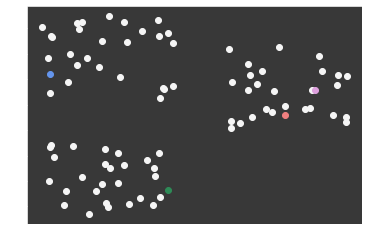

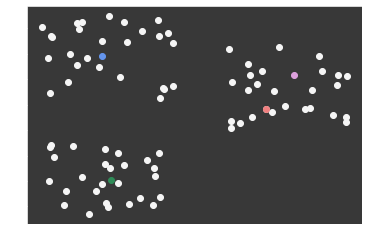

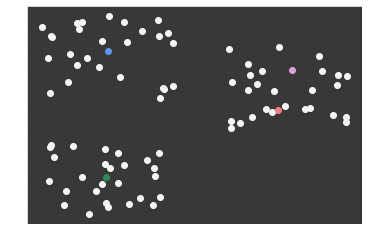

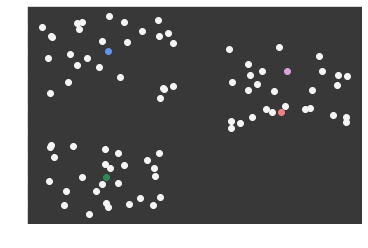

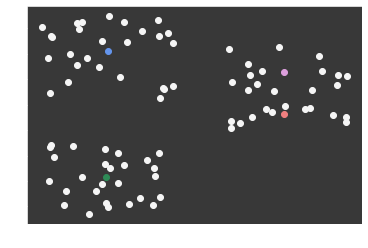

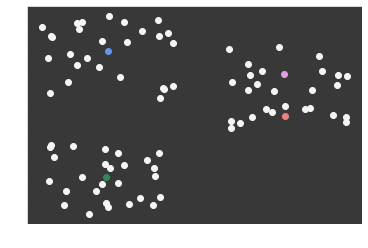

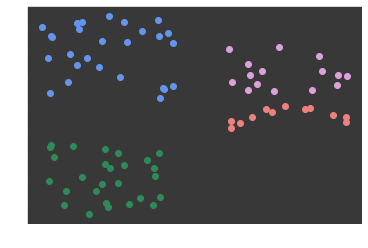

In [87]:
model = K_means()

result = model.clusterize(x,4,2)